# 磁通随气隙的变化  

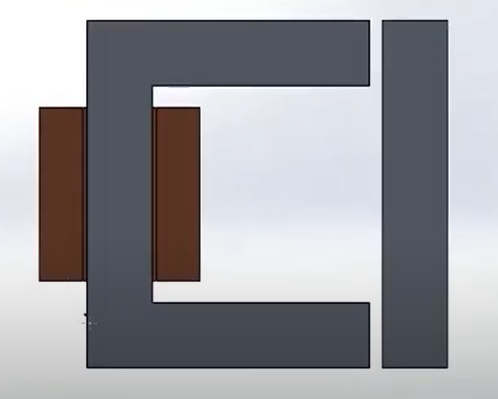  
几何参数：  
 - C 形钢：外宽80cm，内宽50cm  
 - I 形钢：高80cm，宽15cm  
 - 气隙：3cm  
 - 绕组：10x40cm，气隙： 1cm, 5cm
 - 边界条件：最大宽度的两倍 220cm x 220cm


下面代码会绘制如下的图像：  
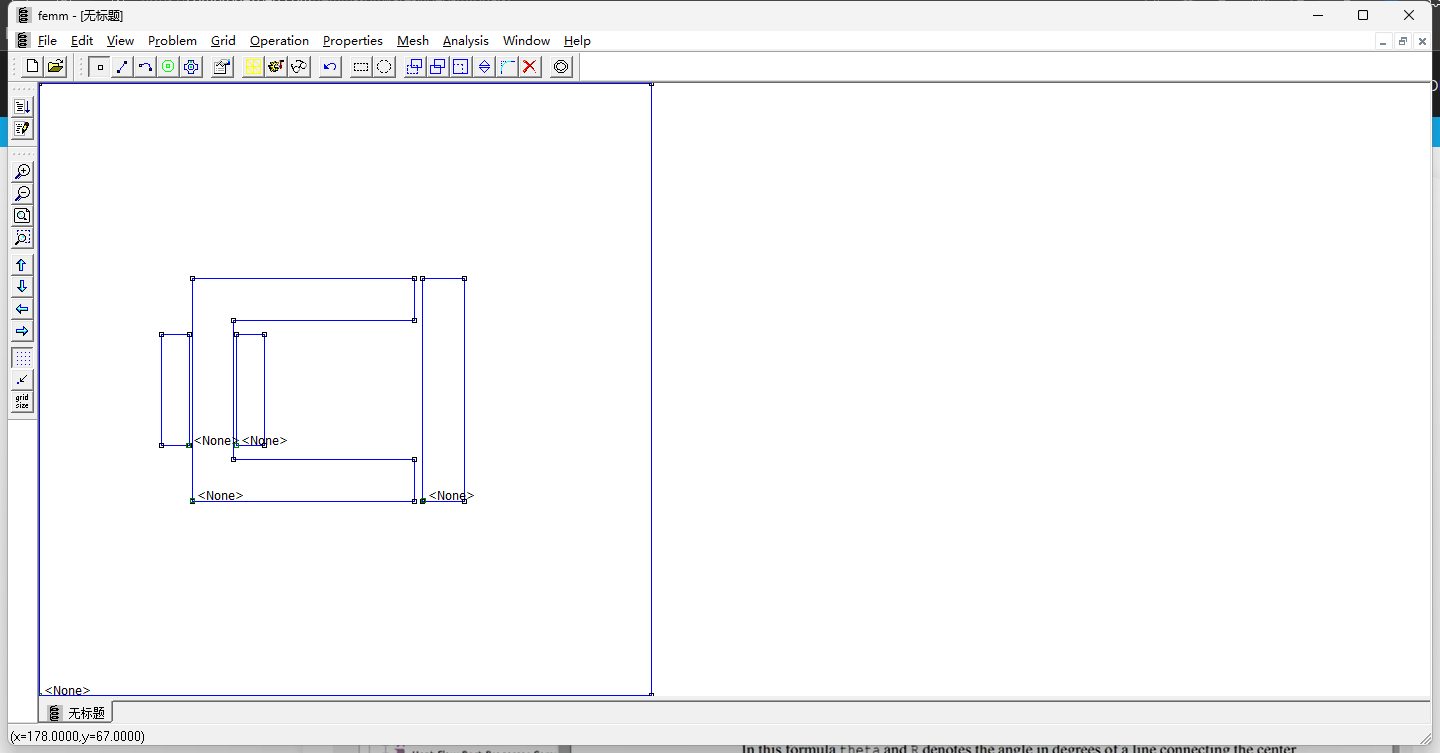

In [6]:
from tpyFEMM import MagDocument,DocType,MagBlock, MagBoundary,MagNode,MagLineSegment,Group,Point,MagCiruit,MagMaterial,DefaultMagMaterial 

doc =MagDocument(docType=DocType.Magnetics)

iron = doc.loadMaterial(MagMaterial.GetDefault(DefaultMagMaterial.PureIron))
air = doc.loadMaterial(MagMaterial.GetDefault(DefaultMagMaterial.Air))
swg_14 = doc.loadMaterial(MagMaterial.GetDefault(DefaultMagMaterial.SWG_14))

cIn = doc.loadCircuit(MagCiruit("cIn", 1, 1))
cOut = doc.loadCircuit(MagCiruit("cOut", -1, 1))

bdry = doc.loadBoundary(MagBoundary("bdry"))

# C 形钢  
def getIronCSegment(i:int, start:MagNode, end:MagNode ):
    return MagLineSegment(start, end)
ironCLabel =  MagBlock(Point(0.1,0.1), iron)
ironC = Group.Polygon(getIronCSegment,ironCLabel,
                      MagNode(Point(0,0)),
                      MagNode(Point(80,0)),
                      MagNode(Point(80,15)),
                      MagNode(Point(15,15)),
                      MagNode(Point(15,65)),
                      MagNode(Point(80,65)),
                      MagNode(Point(80,80)),
                      MagNode(Point(0,80))
                      )
doc.addGroup(ironC)

# I 形钢
def getIronBarSegment(i:int, start:MagNode, end:MagNode ):
    return MagLineSegment(start, end)
ironBarLabel =  MagBlock(Point(83.1,0.1), iron)
ironBar = Group.Polygon(getIronBarSegment,ironBarLabel,
                      MagNode(Point(83,0)),
                      MagNode(Point(98,0)),
                      MagNode(Point(98,80)),
                      MagNode(Point(83,80))
                      )
doc.addGroup(ironBar)


# 绕组  
def getWindingSegment(i:int, start:MagNode, end:MagNode ):
    return MagLineSegment(start, end)
windingLeftLabel =  MagBlock(Point(-1.1,20.1), swg_14, inCircuit=cIn, turns=100)
windingRightLabel =  MagBlock(Point(16.1,20.1),swg_14, inCircuit=cIn, turns=100)
windingLeft = Group.Polygon(getWindingSegment,windingLeftLabel,
                      MagNode(Point(-1,20)),
                      MagNode(Point(-11,20)),
                      MagNode(Point(-11,60)),
                      MagNode(Point(-1,60))
                      )
windingRight = Group.Polygon(getWindingSegment,windingRightLabel,
                      MagNode(Point(16,20)),
                      MagNode(Point(26,20)),
                      MagNode(Point(26,60)),
                      MagNode(Point(16,60))
                      )

doc.addGroup(windingLeft, windingRight)

# 边界条件
def getBoundarySegment(i:int, start:MagNode, end:MagNode ):
    return MagLineSegment(start, end, prop=bdry )
boundaryLabel =  MagBlock(Point(.1,.1), air)
boundary = Group.Polygon(getBoundarySegment,boundaryLabel,
                         MagNode(Point(0,0)),
                         MagNode(Point(220,0)),
                         MagNode(Point(220,220)),
                         MagNode(Point(0,220)),
                         )
boundary.translate(-55,-70)
doc.addGroup(boundary)

doc.render()

doc.preProcess()
import femm
for i in range(100):
    femm.mi_selectgroup(ironBar.no)
    femm.mi_movetranslate(i/500.0,0)
    doc.process()
    doc.postProcess(i=100+i)


In [7]:
import glob
import imageio

# 读取所有 BMP 图像
images = []
for filename in glob.glob('out\\*.bmp'):
    images.append(imageio.imread(filename))

# 将图像序列组合成 GIF 动画
imageio.mimsave('out\\output.gif', images)

C:\Users\fbouy\AppData\Local\Temp\ipykernel_7648\1841206135.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
